In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

### Схема "Левый уголок"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Расчетный порядок метода по x: 1.06
Расчетный порядок метода по t: 1.06
Расчетный порядок метода по x: 1.04
Расчетный порядок метода по t: 1.04


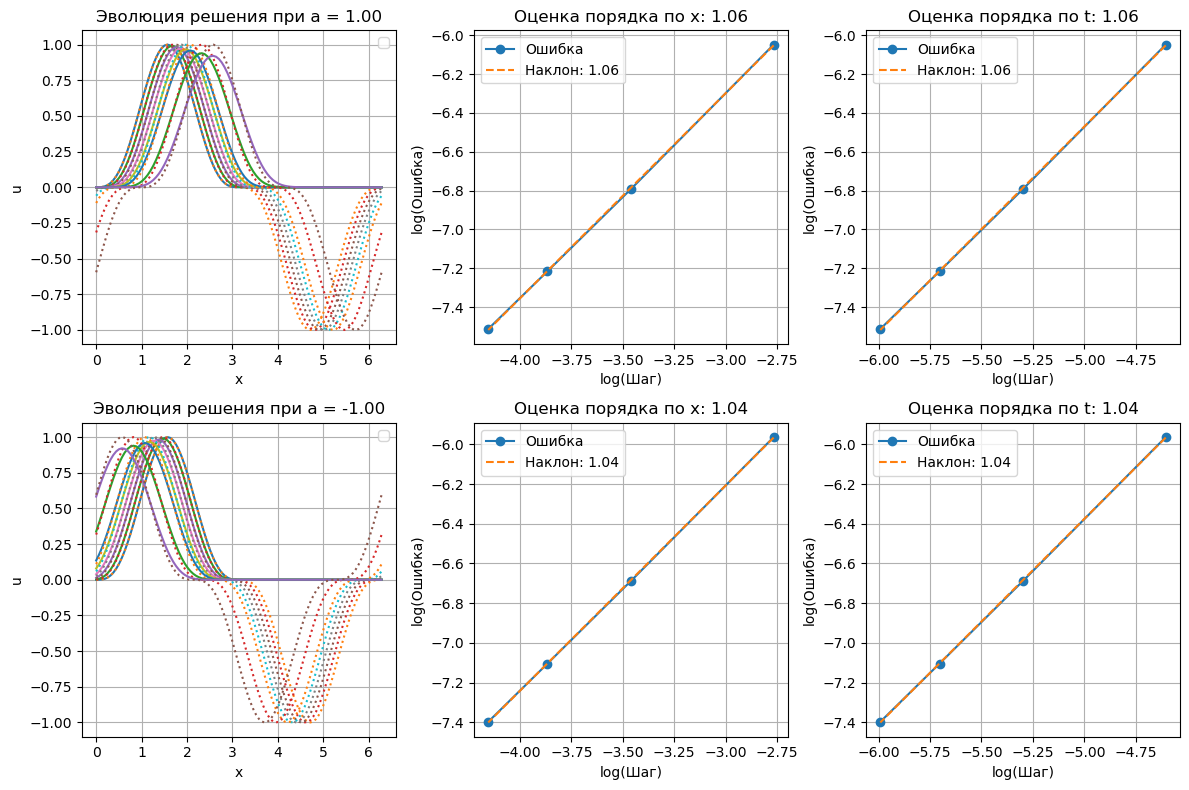

In [25]:
L = 2 * np.pi
T = 1.0

# Аналитическое решение
def analytical_solution(a, x, t):
    return np.sin(x - a * t)**3

def solve_transport_equation(a, Nx, Nt):
    dx = L / Nx
    dt = T / Nt
    x = np.linspace(0, L, Nx + 1)
    t = np.linspace(0, T, Nt + 1)
    u = np.zeros((Nx + 1, Nt + 1))
    u[:, 0] = np.where(x <= np.pi, np.sin(x)**3, 0)  # начальные условия

    if a >= 0:
        for n in range(0, Nt):
            for i in range(1, Nx + 1):  # Левая разностная схема
                u[i, n + 1] = u[i, n] - a * dt / dx * (u[i, n] - u[i - 1, n])
            u[0, n + 1] = 0  # Левая граница
    else:
        for n in range(0, Nt):
            for i in range(0, Nx):  # Правая разностная схема
                u[i, n + 1] = u[i, n] - a * dt / dx * (u[i + 1, n] - u[i, n])
            u[Nx, n + 1] = 0  # Правая граница

    return u, x, t

def calculate_order(a, n):
    Nx_values = [100, 200, 300, 400] 
    Nt_values = [100, 200, 300, 400]
    dx_values = [L/N for N in Nx_values]
    dt_values = [T/N for N in Nt_values]
    error_norms = []

    for k in range(0, 4):
        Nx = Nx_values[k]
        Nt = Nt_values[k]
        u_coarse, x_coarse, t_coarse = solve_transport_equation(a, Nx, Nt)

        u_fine = np.zeros((Nx+1, Nt+1))
        for i in range(Nx+1):  # Цикл по x
            for j in range(Nt+1):  # Цикл по t
                u_fine[i, j] = analytical_solution(a, x_coarse[i], t_coarse[j])

        # Ошибка на fine сетке
        error = np.abs(u_fine - u_coarse)
        error_norm = np.linalg.norm(error, ord=1) / (Nt*Nx)
        error_norms.append(error_norm)
    
    log_dx_values = np.log(dx_values)
    log_dt_values = np.log(dt_values)
    log_error_norms = np.log(error_norms)
    coeffsx = linregress(log_dx_values, log_error_norms)
    coeffst = linregress(log_dt_values, log_error_norms)

    order_x = coeffsx[0]
    order_t = coeffst[0]

    axes[n-1, 1].plot(log_dx_values, log_error_norms, 'o-', label='Ошибка')
    axes[n-1, 1].plot(log_dx_values, coeffsx[0] * log_dx_values + coeffsx[1], '--', label=f'Наклон: {order_x:.2f}')
    axes[n-1, 1].set_xlabel('log(Шаг)')
    axes[n-1, 1].set_ylabel('log(Ошибка)')
    axes[n-1, 1].legend()
    axes[n-1, 1].set_title(f'Оценка порядка по x: {order_x:.2f}')
    axes[n-1, 1].grid()

    axes[n-1, 2].plot(log_dt_values, log_error_norms, 'o-', label='Ошибка')
    axes[n-1, 2].plot(log_dt_values, coeffst[0] * log_dt_values + coeffst[1], '--', label=f'Наклон: {order_t:.2f}')
    axes[n-1, 2].set_xlabel('log(Шаг)')
    axes[n-1, 2].set_ylabel('log(Ошибка)')
    axes[n-1, 2].legend()
    axes[n-1, 2].set_title(f'Оценка порядка по t: {order_t:.2f}')
    axes[n-1, 2].grid()

    print(f"Расчетный порядок метода по x: {order_x:.2f}")
    print(f"Расчетный порядок метода по t: {order_t:.2f}")
    
    return 0

def compare_solutions(a, n):
    # Аналитическое решение
    Nx_val = 100
    Nt_val = 200
    Y_metod, X_arr, T_arr = solve_transport_equation(a, Nx_val, Nt_val)
    Y_analit = np.zeros((Nx_val+1, Nt_val+1))
    for i in range(Nx_val+1):  # Цикл по x
        for j in range(Nt_val+1):  # Цикл по t
            Y_analit[i, j] = analytical_solution(a, X_arr[i], T_arr[j])

    times_to_plot = [0, 20, 40, 60, 80, 100, 150, 200]  # номера временных слоёв
    for j in times_to_plot:
        # axes[n-1, 0].plot(X_arr, Y_metod[:, j], label=f'Числ. t={T_arr[j]:.2f}')
        # axes[n-1, 0].plot(X_arr, Y_analit[:, j], linestyle=':', label=f'Аналит. t={T_arr[j]:.2f}')
        axes[n-1, 0].plot(X_arr, Y_metod[:, j])
        axes[n-1, 0].plot(X_arr, Y_analit[:, j], linestyle=':')
    axes[n-1, 0].legend()
    axes[n-1, 0].set_title(f'Эволюция решения при a = {a:.2f}')
    axes[n-1, 0].set_xlabel('x')
    axes[n-1, 0].set_ylabel('u')
    axes[n-1, 0].grid()

def solve_equation(a, n):
    compare_solutions(a, n)

    calculate_order(a, n)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

a1 = 1.0
solve_equation(a1, 1)

a2 = -1.0
solve_equation(a2, 2)

plt.tight_layout() 
plt.show()




### Схема "Центральный уголок"

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Расчетный порядок метода по x: 2.03
Расчетный порядок метода по t: 1.02
Расчетный порядок метода по x: 2.00
Расчетный порядок метода по t: 1.00


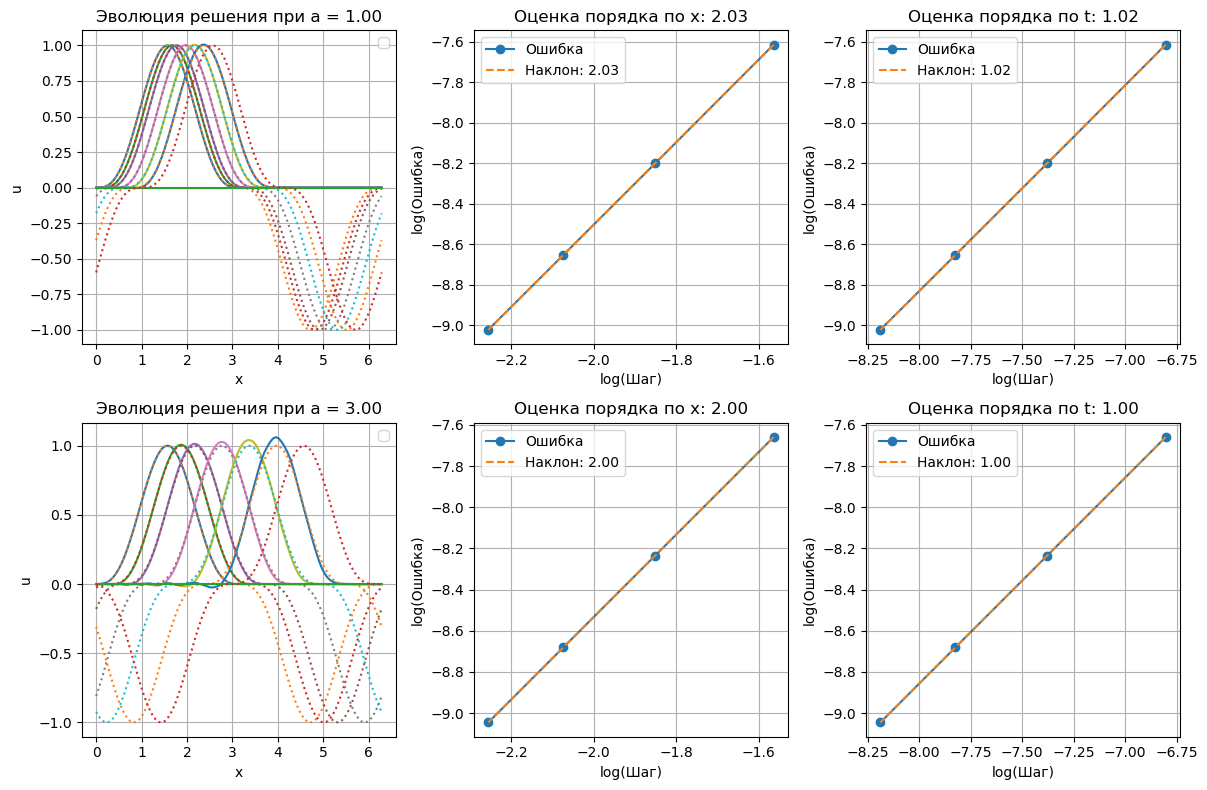

In [26]:
L = 2 * np.pi
T = 1.0

def analytical_solution(a, x, t):
    return np.sin(x - a * t)**3

def solve_transport_equation(a, Nx, Nt):
    dx = L / Nx
    dt = T / Nt
    x = np.linspace(0, L, Nx+1)
    t = np.linspace(0, T, Nt+1)
    u = np.zeros((Nx+1, Nt+1))
    u[:, 0] = np.where(x <= np.pi, np.sin(x)**3, 0)

    for n in range(0, Nt - 1):
        for i in range(1, Nx):  # до Nx включительно
            u[i, n + 1] = u[i, n] - (a * dt / (2 * dx)) * (u[i + 1, n] - u[i - 1, n])

        u[0, n + 1] = 0     # левая граница
        u[Nx, n + 1] = 0    # правая граница

    return u, x, t

def calculate_order(a, n):
    Nx_values = [30, 40, 50, 60] 
    Nt_values = [900, 1600, 2500, 3600]
    dx_values = [L/N for N in Nx_values]
    dt_values = [T/N for N in Nt_values]
    error_norms = []

    for k in range(0, 4):
        Nx = Nx_values[k]
        Nt = Nt_values[k]
        u_coarse, x_coarse, t_coarse = solve_transport_equation(a, Nx, Nt)

        u_fine = np.zeros((Nx+1, Nt+1))
        for i in range(Nx+1):  # Цикл по x
            for j in range(Nt+1):  # Цикл по t
                u_fine[i, j] = analytical_solution(a, x_coarse[i], t_coarse[j])

        error = np.abs(u_fine - u_coarse)
        error_norm = np.linalg.norm(error, ord=1) / (Nt*Nx)
        error_norms.append(error_norm)
    
    log_dx_values = np.log(dx_values)
    log_dt_values = np.log(dt_values)
    log_error_norms = np.log(error_norms)
    coeffsx = linregress(log_dx_values, log_error_norms)
    coeffst = linregress(log_dt_values, log_error_norms)

    order_x = coeffsx[0]
    order_t = coeffst[0]

    axes[n-1, 1].plot(log_dx_values, log_error_norms, 'o-', label='Ошибка')
    axes[n-1, 1].plot(log_dx_values, coeffsx[0] * log_dx_values + coeffsx[1], '--', label=f'Наклон: {order_x:.2f}')
    axes[n-1, 1].set_xlabel('log(Шаг)')
    axes[n-1, 1].set_ylabel('log(Ошибка)')
    axes[n-1, 1].legend()
    axes[n-1, 1].set_title(f'Оценка порядка по x: {order_x:.2f}')
    axes[n-1, 1].grid()

    axes[n-1, 2].plot(log_dt_values, log_error_norms, 'o-', label='Ошибка')
    axes[n-1, 2].plot(log_dt_values, coeffst[0] * log_dt_values + coeffst[1], '--', label=f'Наклон: {order_t:.2f}')
    axes[n-1, 2].set_xlabel('log(Шаг)')
    axes[n-1, 2].set_ylabel('log(Ошибка)')
    axes[n-1, 2].legend()
    axes[n-1, 2].set_title(f'Оценка порядка по t: {order_t:.2f}')
    axes[n-1, 2].grid()

    print(f"Расчетный порядок метода по x: {order_x:.2f}")
    print(f"Расчетный порядок метода по t: {order_t:.2f}")
    
    return 0

def compare_solutions(a, n):
    Nx_val = 100
    Nt_val = 200
    Y_metod, X_arr, T_arr = solve_transport_equation(a, Nx_val, Nt_val)
    Y_analit = np.zeros((Nx_val+1, Nt_val+1))
    for i in range(Nx_val+1):  # Цикл по x
        for j in range(Nt_val+1):  # Цикл по t
            Y_analit[i, j] = analytical_solution(a, X_arr[i], T_arr[j])

    times_to_plot = [0, 20, 40, 80, 120, 160, 200]
    for j in times_to_plot:
        # axes[n-1, 0].plot(X_arr, Y_metod[:, j], label=f'Числ. t={T_arr[j]:.2f}')
        # axes[n-1, 0].plot(X_arr, Y_analit[:, j], linestyle=':', label=f'Аналит. t={T_arr[j]:.2f}')
        axes[n-1, 0].plot(X_arr, Y_metod[:, j])
        axes[n-1, 0].plot(X_arr, Y_analit[:, j], linestyle=':')
    axes[n-1, 0].set_xlabel('x')
    axes[n-1, 0].set_ylabel('u')
    axes[n-1, 0].set_title(f'Эволюция решения при a = {a:.2f}')
    axes[n-1, 0].legend()
    axes[n-1, 0].grid()

def solve_equation(a, n):
    compare_solutions(a, n)

    calculate_order(a, n)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

a1 = 1.0
solve_equation(a1, 1)

a2 = 3.0
solve_equation(a2, 2)

plt.tight_layout() 
plt.show()




### Схема Лакса

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Расчетный порядок метода по x: 1.01
Расчетный порядок метода по t: 1.01
Расчетный порядок метода по x: 1.00
Расчетный порядок метода по t: 1.00


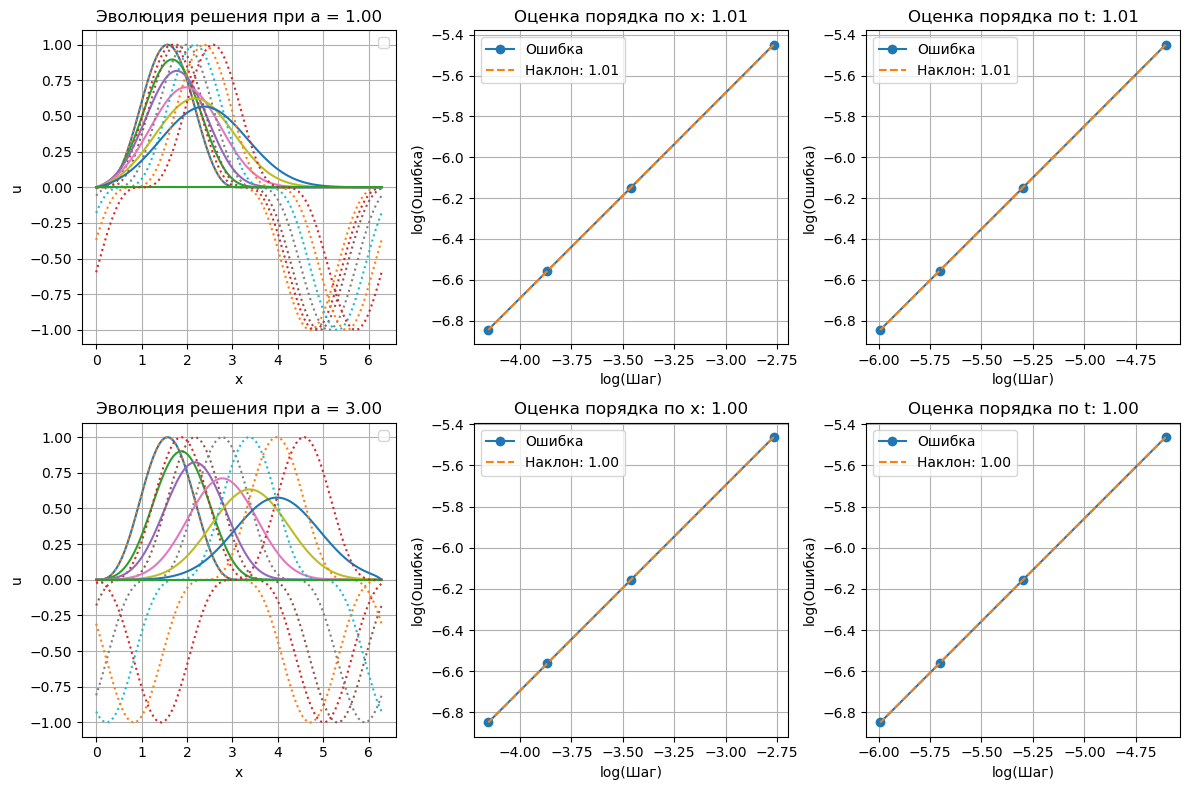

In [27]:
L = 2 * np.pi
T = 1.0

def analytical_solution(a, x, t):
    return np.sin(x - a * t)**3

def solve_transport_equation(a, Nx, Nt):
    dx = L / Nx
    dt = T / Nt
    x = np.linspace(0, L, Nx+1)
    t = np.linspace(0, T, Nt+1)
    u = np.zeros((Nx+1, Nt+1))
    u[:, 0] = np.where(x <= np.pi, np.sin(x)**3, 0)

    for n in range(0, Nt - 1):
        for i in range(1, Nx):
            u[i, n + 1] = u[i, n+1] = 0.5*(u[i+1, n] + u[i-1, n]) - (a*dt)/(2*dx)*(u[i+1, n] - u[i-1, n])
        
        # Граничные условия (периодические)
        # u[0, n+1] = 0.5*(u[1, n] + u[-2, n]) - (a*dt)/(2*dx)*(u[1, n] - u[-2, n])
        # u[-1, n+1] = u[0, n+1]
        u[0, n+1] = 0
        u[Nx, n+1] = 0

    return u, x, t

def calculate_order(a, n):
    Nx_values = [100, 200, 300, 400] 
    Nt_values = [100, 200, 300, 400]
    dx_values = [L/N for N in Nx_values]
    dt_values = [T/N for N in Nt_values]
    error_norms = []

    for k in range(0, 4):
        Nx = Nx_values[k]
        Nt = Nt_values[k]
        u_coarse, x_coarse, t_coarse = solve_transport_equation(a, Nx, Nt)

        u_fine = np.zeros((Nx+1, Nt+1))
        for i in range(Nx+1):  # Цикл по x
            for j in range(Nt+1):  # Цикл по t
                u_fine[i, j] = analytical_solution(a, x_coarse[i], t_coarse[j])

        error = np.abs(u_fine - u_coarse)
        error_norm = np.linalg.norm(error, ord=1) / (Nt*Nx)
        error_norms.append(error_norm)
    
    log_dx_values = np.log(dx_values)
    log_dt_values = np.log(dt_values)
    log_error_norms = np.log(error_norms)
    coeffsx = linregress(log_dx_values, log_error_norms)
    coeffst = linregress(log_dt_values, log_error_norms)

    order_x = coeffsx[0]
    order_t = coeffst[0]

    axes[n-1, 1].plot(log_dx_values, log_error_norms, 'o-', label='Ошибка')
    axes[n-1, 1].plot(log_dx_values, coeffsx[0] * log_dx_values + coeffsx[1], '--', label=f'Наклон: {order_x:.2f}')
    axes[n-1, 1].set_xlabel('log(Шаг)')
    axes[n-1, 1].set_ylabel('log(Ошибка)')
    axes[n-1, 1].legend()
    axes[n-1, 1].set_title(f'Оценка порядка по x: {order_x:.2f}')
    axes[n-1, 1].grid()

    axes[n-1, 2].plot(log_dt_values, log_error_norms, 'o-', label='Ошибка')
    axes[n-1, 2].plot(log_dt_values, coeffst[0] * log_dt_values + coeffst[1], '--', label=f'Наклон: {order_t:.2f}')
    axes[n-1, 2].set_xlabel('log(Шаг)')
    axes[n-1, 2].set_ylabel('log(Ошибка)')
    axes[n-1, 2].legend()
    axes[n-1, 2].set_title(f'Оценка порядка по t: {order_t:.2f}')
    axes[n-1, 2].grid()

    print(f"Расчетный порядок метода по x: {order_x:.2f}")
    print(f"Расчетный порядок метода по t: {order_t:.2f}")
    
    return 0

def compare_solutions(a, n):
    Nx_val = 100
    Nt_val = 200
    Y_metod, X_arr, T_arr = solve_transport_equation(a, Nx_val, Nt_val)
    Y_analit = np.zeros((Nx_val+1, Nt_val+1))
    for i in range(Nx_val+1):  # Цикл по x
        for j in range(Nt_val+1):  # Цикл по t
            Y_analit[i, j] = analytical_solution(a, X_arr[i], T_arr[j])

    times_to_plot = [0, 20, 40, 80, 120, 160, 200]
    for j in times_to_plot:
        # axes[n-1, 0].plot(X_arr, Y_metod[:, j], label=f'Числ. t={T_arr[j]:.2f}')
        # axes[n-1, 0].plot(X_arr, Y_analit[:, j], linestyle=':', label=f'Аналит. t={T_arr[j]:.2f}')
        axes[n-1, 0].plot(X_arr, Y_metod[:, j])
        axes[n-1, 0].plot(X_arr, Y_analit[:, j], linestyle=':')
    axes[n-1, 0].set_xlabel('x')
    axes[n-1, 0].set_ylabel('u')
    axes[n-1, 0].set_title(f'Эволюция решения при a = {a:.2f}')
    axes[n-1, 0].legend()
    axes[n-1, 0].grid()

def solve_equation(a, n):
    compare_solutions(a, n)

    calculate_order(a, n)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

a1 = 1.0
solve_equation(a1, 1)

a2 = 3.0
solve_equation(a2, 2)

plt.tight_layout() 
plt.show()


### Cхема Лакс-Вендрофа

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Расчетный порядок метода по x: 2.03
Расчетный порядок метода по t: 1.02
Расчетный порядок метода по x: 2.00
Расчетный порядок метода по t: 1.00


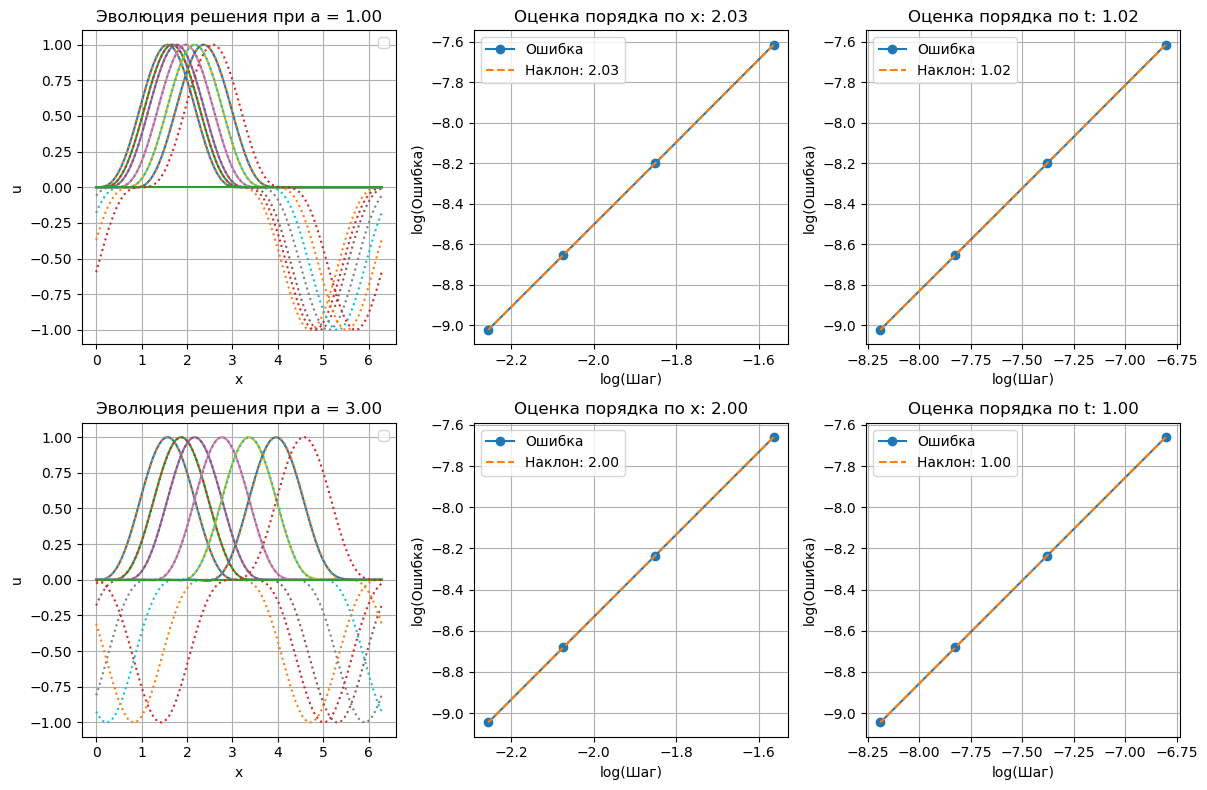

In [28]:
L = 2 * np.pi
T = 1.0

def analytical_solution(a, x, t):
    return np.sin(x - a * t)**3

def solve_transport_equation(a, Nx, Nt):
    dx = L / Nx
    dt = T / Nt
    x = np.linspace(0, L, Nx+1)
    t = np.linspace(0, T, Nt+1)
    u = np.zeros((Nx+1, Nt+1))
    u[:, 0] = np.where(x <= np.pi, np.sin(x)**3, 0)

    for n in range(0, Nt - 1):
        for i in range(1, Nx - 1):
            u[i, n + 1] = u[i, n] - (a * dt / (2 * dx)) * (u[i+1, n] - u[i-1, n]) + (a**2 * dt**2 / (2 * dx**2)) * (u[i+1, n] - 2 * u[i, n] + u[i-1, n])
        
        # Граничные условия (периодические)
        # u[0, n+1] = u[-2, n+1]  # u(0,t) = u(L-dx,t)
        # u[-1, n+1] = u[1, n+1]  # u(L,t) = u(dx,t)
        u[0, n+1] = 0
        u[Nx, n+1] = 0

    return u, x, t

def calculate_order(a, n):
    Nx_values = [30, 40, 50, 60] 
    Nt_values = [900, 1600, 2500, 3600]
    dx_values = [L/N for N in Nx_values]
    dt_values = [T/N for N in Nt_values]
    error_norms = []

    for k in range(0, 4):
        Nx = Nx_values[k]
        Nt = Nt_values[k]
        u_coarse, x_coarse, t_coarse = solve_transport_equation(a, Nx, Nt)

        u_fine = np.zeros((Nx+1, Nt+1))
        for i in range(Nx+1):  # Цикл по x
            for j in range(Nt+1):  # Цикл по t
                u_fine[i, j] = analytical_solution(a, x_coarse[i], t_coarse[j])

        error = np.abs(u_fine - u_coarse)
        error_norm = np.linalg.norm(error, ord=1) / (Nt*Nx)
        error_norms.append(error_norm)
    
    log_dx_values = np.log(dx_values)
    log_dt_values = np.log(dt_values)
    log_error_norms = np.log(error_norms)
    coeffsx = linregress(log_dx_values, log_error_norms)
    coeffst = linregress(log_dt_values, log_error_norms)

    order_x = coeffsx[0]
    order_t = coeffst[0]

    axes[n-1, 1].plot(log_dx_values, log_error_norms, 'o-', label='Ошибка')
    axes[n-1, 1].plot(log_dx_values, coeffsx[0] * log_dx_values + coeffsx[1], '--', label=f'Наклон: {order_x:.2f}')
    axes[n-1, 1].set_xlabel('log(Шаг)')
    axes[n-1, 1].set_ylabel('log(Ошибка)')
    axes[n-1, 1].legend()
    axes[n-1, 1].set_title(f'Оценка порядка по x: {order_x:.2f}')
    axes[n-1, 1].grid()

    axes[n-1, 2].plot(log_dt_values, log_error_norms, 'o-', label='Ошибка')
    axes[n-1, 2].plot(log_dt_values, coeffst[0] * log_dt_values + coeffst[1], '--', label=f'Наклон: {order_t:.2f}')
    axes[n-1, 2].set_xlabel('log(Шаг)')
    axes[n-1, 2].set_ylabel('log(Ошибка)')
    axes[n-1, 2].legend()
    axes[n-1, 2].set_title(f'Оценка порядка по t: {order_t:.2f}')
    axes[n-1, 2].grid()

    print(f"Расчетный порядок метода по x: {order_x:.2f}")
    print(f"Расчетный порядок метода по t: {order_t:.2f}")
    
    return 0

def compare_solutions(a, n):
    Nx_val = 100
    Nt_val = 200
    Y_metod, X_arr, T_arr = solve_transport_equation(a, Nx_val, Nt_val)
    Y_analit = np.zeros((Nx_val+1, Nt_val+1))
    for i in range(Nx_val+1):  # Цикл по x
        for j in range(Nt_val+1):  # Цикл по t
            Y_analit[i, j] = analytical_solution(a, X_arr[i], T_arr[j])

    times_to_plot = [0, 20, 40, 80, 120, 160, 200]
    for j in times_to_plot:
        # axes[n-1, 0].plot(X_arr, Y_metod[:, j], label=f'Числ. t={T_arr[j]:.2f}')
        # axes[n-1, 0].plot(X_arr, Y_analit[:, j], linestyle=':', label=f'Аналит. t={T_arr[j]:.2f}')
        axes[n-1, 0].plot(X_arr, Y_metod[:, j])
        axes[n-1, 0].plot(X_arr, Y_analit[:, j], linestyle=':')
    axes[n-1, 0].set_xlabel('x')
    axes[n-1, 0].set_ylabel('u')
    axes[n-1, 0].set_title(f'Эволюция решения при a = {a:.2f}')
    axes[n-1, 0].legend()
    axes[n-1, 0].grid()

def solve_equation(a, n):
    compare_solutions(a, n)

    calculate_order(a, n)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

a1 = 1.0
solve_equation(a1, 1)

a2 = 3.0
solve_equation(a2, 2)

plt.tight_layout() 
plt.show()


